In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [191]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [192]:
production_ice_cream=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Time series\\Time Series Analysis ritvikmath Nick DeRobertis\\ACF & PACF Code Example , Time Series Talk\\ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
production_ice_cream

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: IPN31152N, Length: 577, dtype: float64

In [193]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [194]:
#just get data from 2010 onwoards
start_date =pd.to_datetime('2010-01-01')
production_ice_cream = production_ice_cream[start_date:]

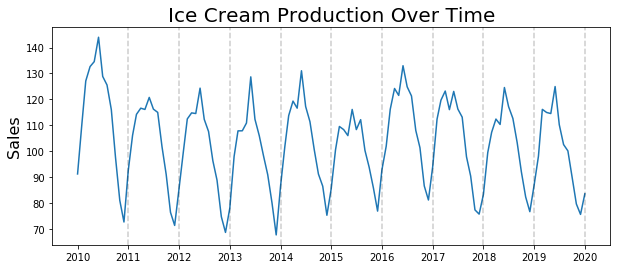

In [195]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-'+'-01-01'), color='k', linestyle='--', alpha=0.2)

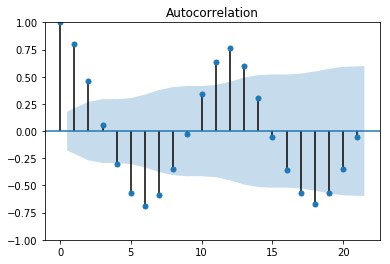

In [196]:
Acf_plot = plot_acf(production_ice_cream)

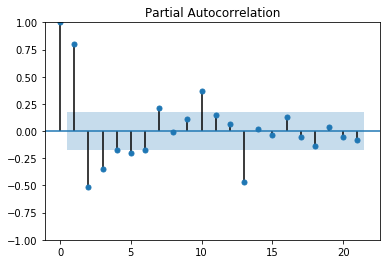

In [197]:
pacf_plot = plot_pacf(production_ice_cream,method='ywm')

In [198]:
train_end = datetime(2016,12,1)
test_end=datetime(2019,12,1)
train_data=production_ice_cream[:train_end]
test_data=production_ice_cream[train_end +timedelta(days=1):test_end]

In [199]:
model=ARIMA(train_data,order=(2,0,3))#ARIMA(P=AR Lags,D=Differencing,Q=MA Lags)
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time',end-start)

Model Fitting Time 0.3674654960632324


In [200]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              IPN31152N   No. Observations:                   84
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -280.926
Date:                Thu, 07 Jul 2022   AIC                            575.853
Time:                        15:58:46   BIC                            592.868
Sample:                    01-01-2010   HQIC                           582.693
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.0297      1.365     76.202      0.000     101.354     106.705
ar.L1          1.7319      0.005    354.974      0.000       1.722       1.741
ar.L2         -0.9973      0.004   -253.000      0.0

In [201]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [202]:
predictions = model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions

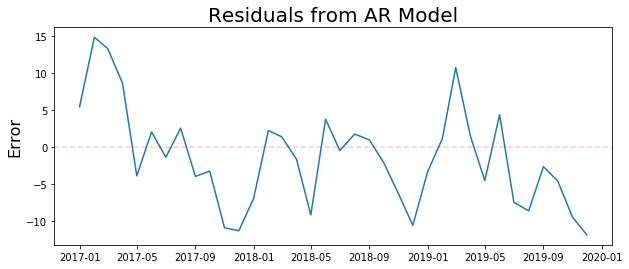

In [203]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

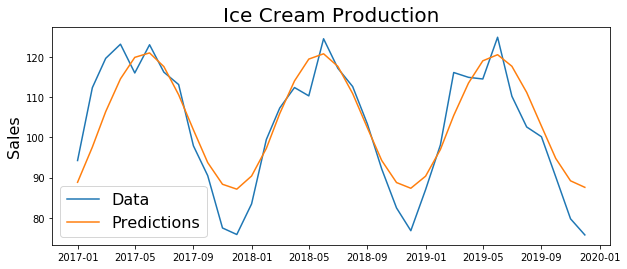

In [204]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [205]:
print('Mean Absolute Percent Error: ',round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error:  0.0574


In [206]:
print('Root Mean Square Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Square Error: 6.815631074793467


In [207]:
#Rolling Forecast
predictions_rolling=pd.Series(dtype='float64')
for end_date in test_data.index:
    #print(end_date)
    #print(train_data.tail())
    train_data=production_ice_cream[:end_date-timedelta(days=1)]
    #print(train_data.tail())
    model=ARIMA(train_data,order=(2,0,1))
    model_fit=model.fit()
    pred=model_fit.predict(end_date)
    print('pred',pred)
    predictions_rolling.loc[end_date]=pred.loc[end_date]

pred 2017-01-01    81.026915
Freq: MS, dtype: float64
pred 2017-02-01    99.478361
Freq: MS, dtype: float64
pred 2017-03-01    118.593973
Freq: MS, dtype: float64
pred 2017-04-01    121.735454
Freq: MS, dtype: float64
pred 2017-05-01    120.870601
Freq: MS, dtype: float64
pred 2017-06-01    109.862425
Freq: MS, dtype: float64
pred 2017-07-01    116.607628
Freq: MS, dtype: float64
pred 2017-08-01    107.685416
Freq: MS, dtype: float64
pred 2017-09-01    105.030722
Freq: MS, dtype: float64
pred 2017-10-01    90.370832
Freq: MS, dtype: float64
pred 2017-11-01    87.033538
Freq: MS, dtype: float64
pred 2017-12-01    78.01952
Freq: MS, dtype: float64
pred 2018-01-01    82.19877
Freq: MS, dtype: float64
pred 2018-02-01    94.152697
Freq: MS, dtype: float64
pred 2018-03-01    111.492942
Freq: MS, dtype: float64
pred 2018-04-01    116.031865
Freq: MS, dtype: float64
pred 2018-05-01    117.212494
Freq: MS, dtype: float64
pred 2018-06-01    111.26804
Freq: MS, dtype: float64
pred 2018-07-01    1

In [208]:
residuals_rolling=test_data-predictions_rolling

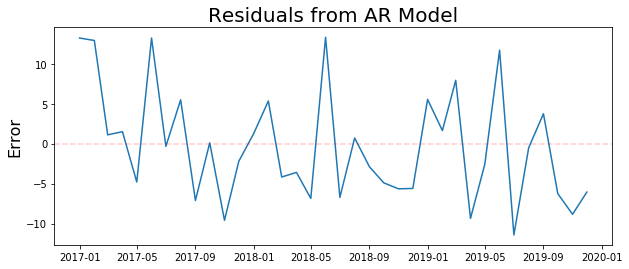

In [209]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

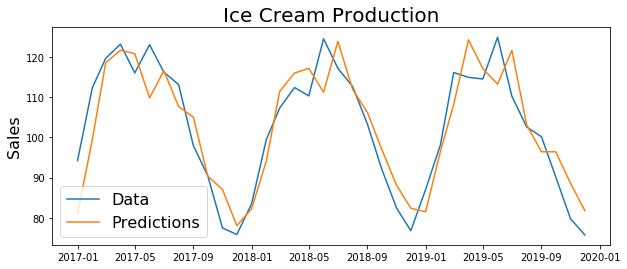

In [210]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [211]:
from scipy.signal import savgol_filter
yhat = savgol_filter(predictions_rolling, 5, 2)
yhat

array([ 80.15120612, 102.04709465, 116.14202193, 123.28729293,
       117.95342774, 115.11821027, 111.86285128, 111.13178566,
       101.46496437,  93.82744157,  83.95902545,  80.10139833,
        81.93903558,  95.50692119, 109.12459945, 117.16413536,
       114.68267902, 117.18424845, 117.59208708, 115.44038257,
       105.06951484,  97.08827407,  88.20953304,  81.55346849,
        84.05911391,  94.18714771, 111.25438522, 119.67936298,
       118.64575578, 117.40148716, 114.99134997, 106.90054942,
        97.23220841,  94.41018334,  88.77839265,  81.99891546])

Text(0, 0.5, 'Sales')

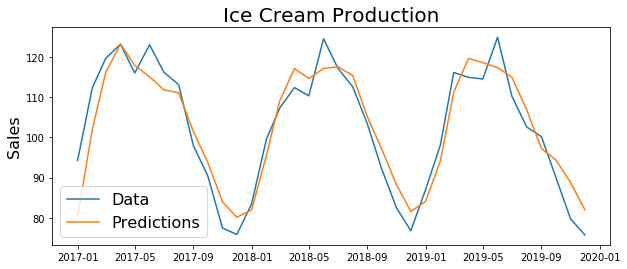

In [212]:
rng = pd.date_range(start="2017-01-01",end="2019-12-01",freq='MS')
rolling_predictions1 = pd.Series(yhat, index=rng)
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(rolling_predictions1)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Sales', fontsize=16)